# Importing Libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the Dataset

In [107]:
train1=pd.read_csv('datacollection1-IDLE.csv')
#train2=pd.read_csv('datacollection2-NORMAL.csv')
train2=pd.read_csv('ubunutu-datacollection3-heavy.csv')
train = pd.concat([train1, train2], ignore_index=True)

In [81]:
train.isnull()

,AttackFlag,CPUPercent,AvailableMemory,ActiveMemory,CPUTime-User,CPUTime-System,CPUTime-Idle
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3596,False,False,False,False,False,False,False
3597,False,False,False,False,False,False,False
3598,False,False,False,False,False,False,False
3599,False,False,False,False,False,False,False


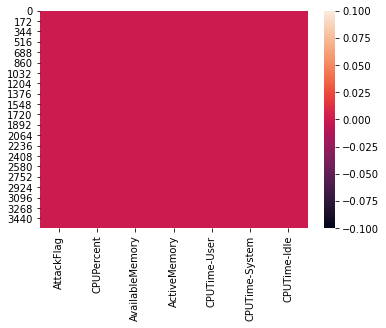

In [82]:
sns.heatmap(train.isnull())

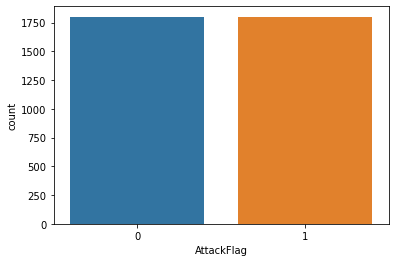

In [83]:
sns.countplot(x='AttackFlag',data=train)

# Test train split

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('AttackFlag',axis=1), train['AttackFlag'], test_size=0.30, random_state=99)

In [108]:
test=pd.read_csv('datacollection2-NORMAL.csv')
X_train, y_train = train.drop('AttackFlag',axis=1), train['AttackFlag']
X_test, y_test = test.drop('AttackFlag',axis=1), test['AttackFlag']

# Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

In [110]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
y_pred = classifier.predict(X_test)

In [112]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [113]:
y_pred_prob = classifier.predict_proba(X_test)

In [114]:
print(np.round(y_pred_prob, 3))
# k-NN classifiers do not output probabilities.You would need to transform distance to a 
# probability yourself, for example by fitting a logistic regression model on the distance.

[[0.2 0.8]
 [0.  1. ]
 [0.  1. ]
 ...
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]


# Evaluate the Algorithm

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
Accuracy = ( cm[0][0] + cm[1][1] ) / ( cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0] )
print(Accuracy)
print(classification_report(y_test, y_pred))

[[   0 1800]
 [   0 1801]]
0.5001388503193558
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1800
           1       0.50      1.00      0.67      1801

    accuracy                           0.50      3601
   macro avg       0.25      0.50      0.33      3601
weighted avg       0.25      0.50      0.33      3601



C:\Users\Ikponmwonsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing Error Rate with the K Value

In [92]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

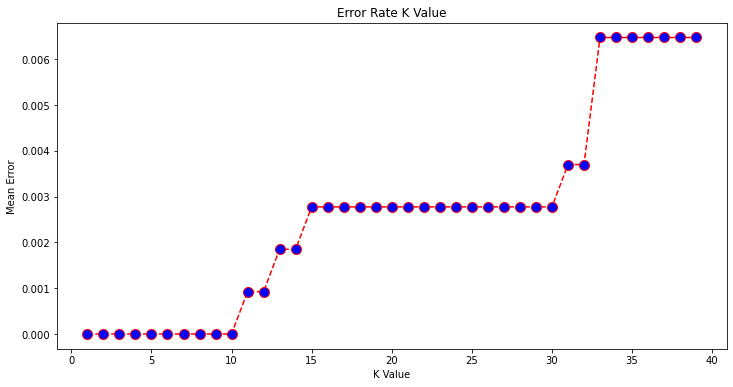

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Feature Importance

Feature: 0, Score: 0.0104762
Feature: 1, Score: 0.1043651
Feature: 2, Score: 0.0069048
Feature: 3, Score: 0.0387302
Feature: 4, Score: 0.0511905
Feature: 5, Score: 0.0792857


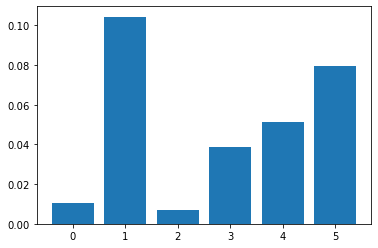

In [94]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(classifier, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.7f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()